In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Load the "Automobile_data.csv" dataset into a DataFrame.
"""

#import data from Automobile_data.csv file
df = pd.read_csv('Automobile_data.csv')

In [3]:
"""
Display the first few rows of the dataset and summarize its structure, 
including the number of rows/columns and data types.
"""
#display first 5 values
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
#get number of rows and columns
dims = df.shape

print("There are " + str(dims[1]) + " rows and " + str(dims[0]) + " columns.\n")

#get data types
types = df.dtypes

print("Below are the data types for each attribute: ")
print(types)

There are 26 rows and 205 columns.

Below are the data types for each attribute: 
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [5]:
"""
Check for and handle missing values in the dataset. 
Replace '?' with appropriate  values, and handle 
them according to the data type of each column.
"""
#determine columns with ? in them
rows_with_q = [col for col in df.columns if df[col].astype(str).str.contains(r'\?').any()]
print(rows_with_q)


['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [6]:
#find all columns with numeric data
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

#replace NaN values with the column mean for numerical data
for col in numeric_cols:
    #replace ? with nan
    df[col] = df[col].replace('?', np.nan)
    #df[col].replace('?', np.nan, inplace=True) - changed based on recommendation for pandas 3.0
    #convert all non na values to numbers
    df[col] = pd.to_numeric(df[col], errors='coerce')
    #replace na values in column with their mean
    df[col] = df[col].fillna(df[col].mean())

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
#get list of body styles
body_styles = df['body-style']
body_list = body_styles.tolist()
print(body_list)

#if car is a sedan, change number of doors to four
df['num-of-doors'] = df.apply(lambda row: 'four' if row['body-style'] == 'sedan' and row['num-of-doors'] == '?' else row['num-of-doors'], axis=1)
print(df)

['convertible', 'convertible', 'hatchback', 'sedan', 'sedan', 'sedan', 'sedan', 'wagon', 'sedan', 'hatchback', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'hatchback', 'hatchback', 'sedan', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'sedan', 'sedan', 'sedan', 'wagon', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'sedan', 'wagon', 'hatchback', 'hatchback', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'hatchback', 'sedan', 'sedan', 'sedan', 'hatchback', 'hatchback', 'hatchback', 'sedan', 'sedan', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'sedan', 'hatchback', 'sedan', 'sedan', 'hatchback', 'sedan', 'sedan', 'sedan', 'wagon', 'hardtop', 'sedan', 'sedan', 'convertible', 'sedan', 'hardtop', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'hatchback', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', 'sedan', '

In [8]:
#check that all ? values are replaced
rows_with_q = [col for col in df.columns if df[col].astype(str).str.contains(r'\?').any()]
print(rows_with_q)

[]


<Axes: xlabel='Normalized Losses', ylabel='Frequency'>

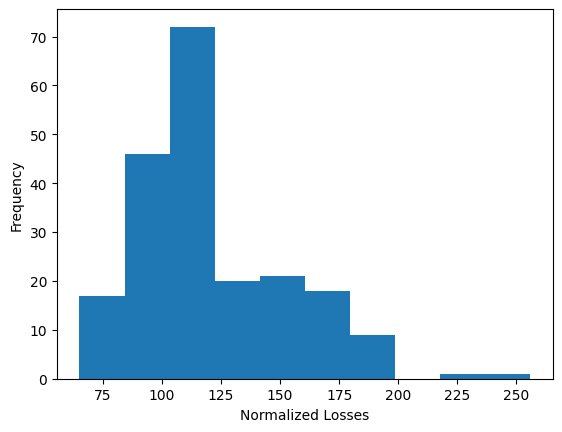

In [9]:
"""
Create visualizations:
"""

"""
Histograms or box plots for the distribution of numerical features 
like 'wheel-base', 'engine-size', 'curb-weight', 'city-mpg', and 'highway-mpg'.
"""

#charts
df['normalized-losses'].plot.hist(xlabel='Normalized Losses')

<Axes: xlabel='Wheel Base', ylabel='Frequency'>

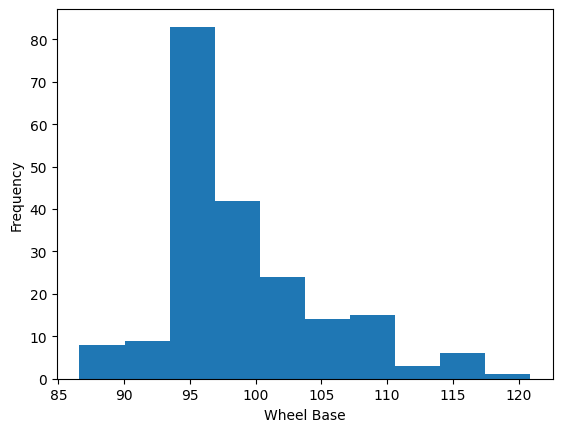

In [10]:
df['wheel-base'].plot.hist(xlabel='Wheel Base')


<Axes: xlabel='Curb Weight', ylabel='Frequency'>

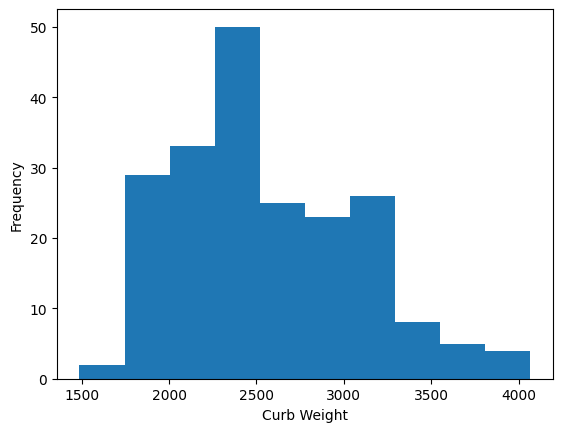

In [11]:
df['curb-weight'].plot.hist(xlabel='Curb Weight')

<Axes: xlabel='City MPG', ylabel='Frequency'>

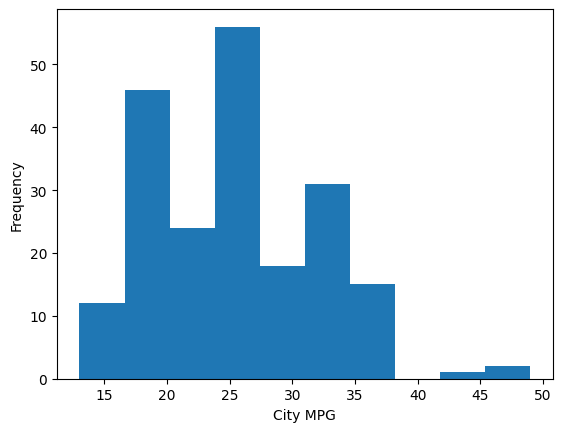

In [12]:
df['city-mpg'].plot.hist(xlabel='City MPG')

<Axes: xlabel='Highway MPG', ylabel='Frequency'>

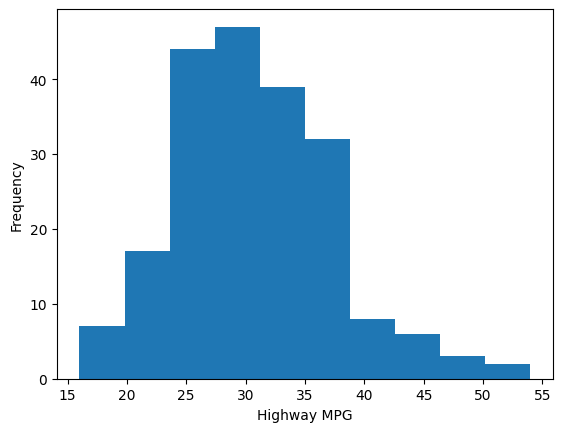

In [13]:
df['highway-mpg'].plot.hist(xlabel='Highway MPG')

<Axes: xlabel='fuel-type'>

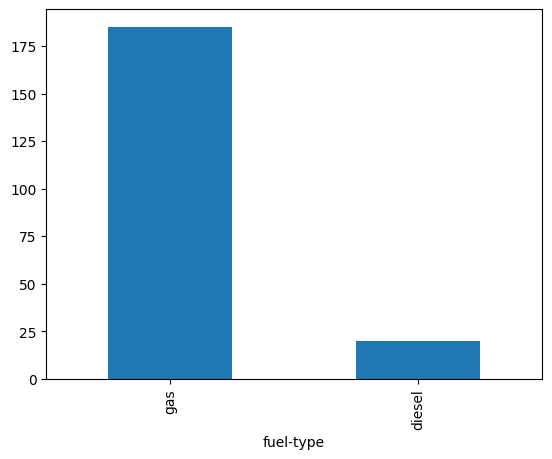

In [14]:
"""
Bar charts for categorical attributes such as 'make', 
'fuel-type', and 'body-style'.
"""

#count different types in fuel-type
fuel_counts = df['fuel-type'].value_counts()

#plot the counts
fuel_counts.plot(kind='bar')

<Axes: xlabel='make'>

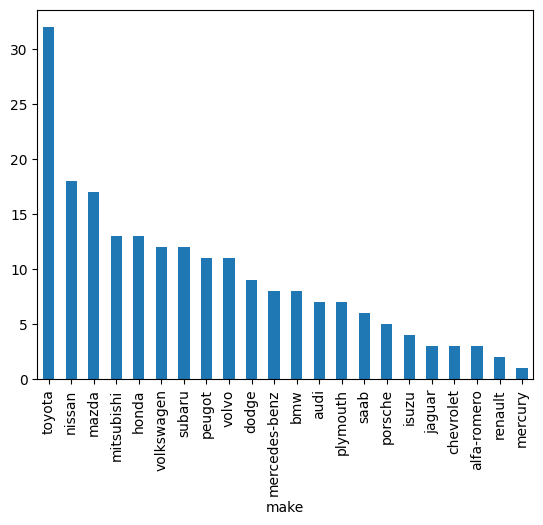

In [15]:
#count the different makes of car
make_counts = df['make'].value_counts()

#plot the counts
make_counts.plot(kind='bar')

<Axes: xlabel='body-style'>

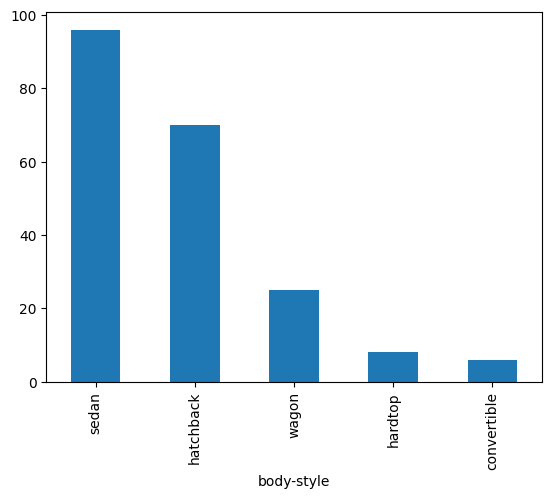

In [16]:
#count the types of bodies
body_counts = df['body-style'].value_counts()

#plot the bodies
body_counts.plot(kind='bar')

<Axes: xlabel='engine-size', ylabel='horsepower'>

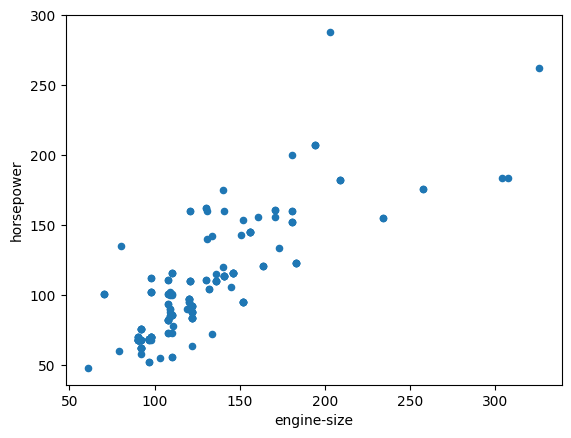

In [17]:
"""
Scatter plots to explore relationships between numerical features, 
especially focusing on the relationships between 
'engine-size' and 'horsepower' as well as 'city-mpg' and 'price'.
"""

# plot engine-size to horsepower
df.plot.scatter(x='engine-size', y='horsepower')

<Axes: xlabel='city-mpg', ylabel='price'>

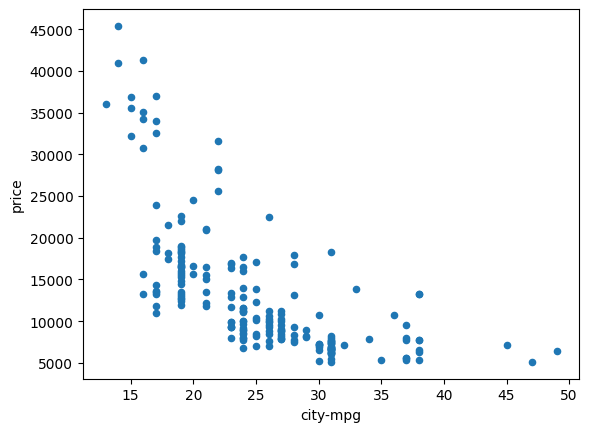

In [18]:
#create city-mpg to price scatter plot
df.plot.scatter(x='city-mpg', y ='price')

In [19]:
"""
Compute the Multivariate Mean Vector: Calculate 
the mean for each numerical attribute in the dataset.
"""

#dataframe of all numeric values
numeric_df = df.select_dtypes(include=np.number)
numeric_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [20]:
#compute mean vector for all numerical values
mean_vector = numeric_df.mean()
print(mean_vector)

symboling                0.834146
normalized-losses      122.000000
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.329751
stroke                   3.255423
compression-ratio       10.142537
horsepower             104.256158
peak-rpm              5125.369458
city-mpg                25.219512
highway-mpg             30.751220
price                13207.129353
dtype: float64


In [21]:
"""
Compute the Sample Covariance Matrix using the Inner Product: 
Use the inner product between the columns of the centered 
data matrix for numerical attributes only.
"""

#center the data
center_df = numeric_df - mean_vector
center_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2.165854,0.0,-10.156585,-5.249268,-1.807805,-4.924878,-7.565854,3.092683,0.140249,-0.575423,-1.142537,6.743842,-125.369458,-4.219512,-3.75122,287.870647
1,2.165854,0.0,-10.156585,-5.249268,-1.807805,-4.924878,-7.565854,3.092683,0.140249,-0.575423,-1.142537,6.743842,-125.369458,-4.219512,-3.75122,3292.870647
2,0.165854,0.0,-4.256585,-2.849268,-0.407805,-1.324878,267.434146,25.092683,-0.649751,0.214577,-1.142537,49.743842,-125.369458,-6.219512,-4.75122,3292.870647
3,1.165854,42.0,1.043415,2.550732,0.292195,0.575122,-218.565854,-17.907317,-0.139751,0.144577,-0.142537,-2.256158,374.630542,-1.219512,-0.75122,742.870647
4,1.165854,42.0,0.643415,2.550732,0.492195,0.575122,268.434146,9.092683,-0.139751,0.144577,-2.142537,10.743842,374.630542,-7.219512,-8.75122,4242.870647


In [22]:
#get length
n = numeric_df.shape[0]

#1 divided by length times dot product of centered data and transposed centered data
#this gives population covariance matrix
cov_matrix = 1/n*np.dot(center_df.T, center_df)
print(cov_matrix)

[[ 1.54322427e+00  1.82634146e+01 -3.96963950e+00 -5.46743843e+00
  -6.19193337e-01 -1.63831291e+00 -1.46915907e+02 -5.45927424e+00
  -4.36607208e-02 -3.37677466e-03 -8.78701249e-01  3.49614322e+00
   1.61768593e+02 -2.90422368e-01  2.95324212e-01 -8.01565174e+02]
 [ 1.82634146e+01  9.98790244e+02 -1.07297561e+01  7.47121951e+00
   5.69414634e+00 -2.85575610e+01  1.60516585e+03  1.45721951e+02
  -2.49892003e-01  5.43060308e-01 -1.43412683e+01  2.53458537e+02
   3.57512195e+03 -4.51170732e+01 -3.86926829e+01  3.32416634e+04]
 [-3.96963950e+00 -1.07297561e+01  3.60848957e+01  6.46582365e+01
   1.02215096e+01  8.63083617e+00  2.42242213e+03  1.42070123e+02
   7.93259847e-01  3.02445577e-01  5.94541744e+00  8.33487637e+01
  -1.03098150e+03 -1.84416895e+01 -2.24522641e+01  2.74980204e+04]
 [-5.46743843e+00  7.47121951e+00  6.46582365e+01  1.51466207e+02
   2.21524447e+01  1.47305792e+01  5.61083212e+03  3.49368957e+02
   2.01659262e+00  4.98667176e-01  7.72507015e+00  2.69001226e+02
  -1.68

In [23]:
#for sample covariance matrix, divide by n-1
samp_cov_matrix = 1/(n-1)*np.dot(center_df.T, center_df)

print(samp_cov_matrix)

[[ 1.55078910e+00  1.83529412e+01 -3.98909852e+00 -5.49423960e+00
  -6.22228599e-01 -1.64634385e+00 -1.47636083e+02 -5.48603539e+00
  -4.38747439e-02 -3.39332748e-03 -8.83008608e-01  3.51328117e+00
   1.62561576e+02 -2.91846007e-01  2.96771879e-01 -8.05494415e+02]
 [ 1.83529412e+01  1.00368627e+03 -1.07823529e+01  7.50784314e+00
   5.72205882e+00 -2.86975490e+01  1.61303431e+03  1.46436275e+02
  -2.51116964e-01  5.45722369e-01 -1.44115686e+01  2.54700980e+02
   3.59264706e+03 -4.53382353e+01 -3.88823529e+01  3.34046127e+04]
 [-3.98909852e+00 -1.07823529e+01  3.62617824e+01  6.49751887e+01
   1.02716150e+01  8.67314419e+00  2.43429675e+03  1.42766545e+02
   7.97148376e-01  3.03928153e-01  5.97456165e+00  8.37573360e+01
  -1.03603533e+03 -1.85320899e+01 -2.25623242e+01  2.76328146e+04]
 [-5.49423960e+00  7.50784314e+00  6.49751887e+01  1.52208688e+02
   2.22610352e+01  1.48027879e+01  5.63833620e+03  3.51081549e+02
   2.02647788e+00  5.01111623e-01  7.76293814e+00  2.70319859e+02
  -1.68

In [24]:
"""
Compute the Sample Covariance Matrix using the Outer Product: 
Use the outer product between the centered data points for 
numerical attributes only.
"""

#covariane matrix using outer products

#create empty array
cov_outer = np.zeros((center_df.shape[1], center_df.shape[1]))

#convert center_df to numpy array
ncenter_df = center_df.to_numpy()

for row in ncenter_df:
    #add to outer product
    cov_outer += np.outer(row, row)

#divide by n to get covariance matrix
cov_matrix = cov_outer/n
print(cov_matrix)
    

[[ 1.54322427e+00  1.82634146e+01 -3.96963950e+00 -5.46743843e+00
  -6.19193337e-01 -1.63831291e+00 -1.46915907e+02 -5.45927424e+00
  -4.36607208e-02 -3.37677466e-03 -8.78701249e-01  3.49614322e+00
   1.61768593e+02 -2.90422368e-01  2.95324212e-01 -8.01565174e+02]
 [ 1.82634146e+01  9.98790244e+02 -1.07297561e+01  7.47121951e+00
   5.69414634e+00 -2.85575610e+01  1.60516585e+03  1.45721951e+02
  -2.49892003e-01  5.43060308e-01 -1.43412683e+01  2.53458537e+02
   3.57512195e+03 -4.51170732e+01 -3.86926829e+01  3.32416634e+04]
 [-3.96963950e+00 -1.07297561e+01  3.60848957e+01  6.46582365e+01
   1.02215096e+01  8.63083617e+00  2.42242213e+03  1.42070123e+02
   7.93259847e-01  3.02445577e-01  5.94541744e+00  8.33487637e+01
  -1.03098150e+03 -1.84416895e+01 -2.24522641e+01  2.74980204e+04]
 [-5.46743843e+00  7.47121951e+00  6.46582365e+01  1.51466207e+02
   2.21524447e+01  1.47305792e+01  5.61083212e+03  3.49368957e+02
   2.01659262e+00  4.98667176e-01  7.72507015e+00  2.69001226e+02
  -1.68

In [25]:
#for samp cov matrix divide by n-1 instead
samp_cov_matrix = cov_outer/(n-1)
print(samp_cov_matrix)

[[ 1.55078910e+00  1.83529412e+01 -3.98909852e+00 -5.49423960e+00
  -6.22228599e-01 -1.64634385e+00 -1.47636083e+02 -5.48603539e+00
  -4.38747439e-02 -3.39332748e-03 -8.83008608e-01  3.51328117e+00
   1.62561576e+02 -2.91846007e-01  2.96771879e-01 -8.05494415e+02]
 [ 1.83529412e+01  1.00368627e+03 -1.07823529e+01  7.50784314e+00
   5.72205882e+00 -2.86975490e+01  1.61303431e+03  1.46436275e+02
  -2.51116964e-01  5.45722369e-01 -1.44115686e+01  2.54700980e+02
   3.59264706e+03 -4.53382353e+01 -3.88823529e+01  3.34046127e+04]
 [-3.98909852e+00 -1.07823529e+01  3.62617824e+01  6.49751887e+01
   1.02716150e+01  8.67314419e+00  2.43429675e+03  1.42766545e+02
   7.97148376e-01  3.03928153e-01  5.97456165e+00  8.37573360e+01
  -1.03603533e+03 -1.85320899e+01 -2.25623242e+01  2.76328146e+04]
 [-5.49423960e+00  7.50784314e+00  6.49751887e+01  1.52208688e+02
   2.22610352e+01  1.48027879e+01  5.63833620e+03  3.51081549e+02
   2.02647788e+00  5.01111623e-01  7.76293814e+00  2.70319859e+02
  -1.68

In [26]:
#create data frame of covariance matrix
column_labels = numeric_df.columns
cov_matrix_df = pd.DataFrame(cov_matrix, columns=column_labels, index=column_labels)
#display covariance matrix data frame
cov_matrix_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.543224,18.263415,-3.969640,-5.467438,-0.619193,-1.638313,-146.915907,-5.459274,-0.043661,-0.003377,-0.878701,3.496143,161.768593,-0.290422,0.295324,-801.565174
normalized-losses,18.263415,998.790244,-10.729756,7.471220,5.694146,-28.557561,1605.165854,145.721951,-0.249892,0.543060,-14.341268,253.458537,3575.121951,-45.117073,-38.692683,33241.663415
wheel-base,-3.969640,-10.729756,36.084896,64.658237,10.221510,8.630836,2422.422127,142.070123,0.793260,0.302446,5.945417,83.348764,-1030.981497,-18.441689,-22.452264,27498.020379
length,-5.467438,7.471220,64.658237,151.466207,22.152445,14.730579,5610.832121,349.368957,2.016593,0.498667,7.725070,269.001226,-1680.828908,-53.886425,-59.576036,65980.373532
width,-0.619193,5.694146,10.221510,22.152445,4.579451,1.456440,963.720949,65.377309,0.323291,0.122468,1.535839,54.177674,-223.866394,-8.975860,-9.955619,12240.515047


Correlation coefficient: 0.8745874759642629
0.8745874759642634


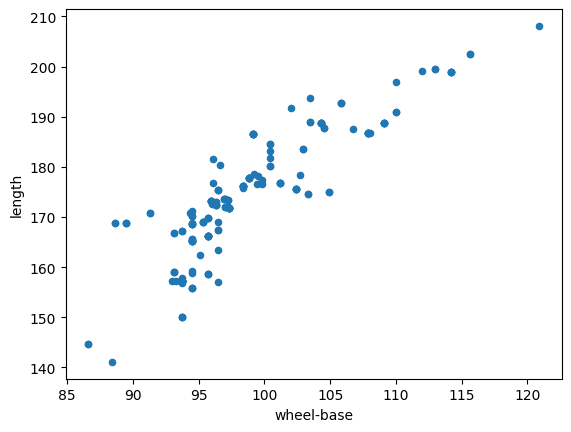

In [49]:
"""Compute the Correlation Between Two Attributes ('wheel-base' and 'length'): 
Calculate the correlation between these two attributes by 
finding the cosine of the angle between the centered attribute vectors. 
Include a scatter plot of these two attributes."""

#get centered vectors for wheel-base and length
center_wb = center_df['wheel-base']
center_l = center_df['length']

#calculate the dot product between two vectors
dp = np.dot(center_wb, center_l)

#calculate norm 2 for each vector
norm_wb = np.linalg.norm(center_wb)
norm_l = np.linalg.norm(center_l)

#calculate cosine of angle between vectors
cos_sim = dp/(norm_wb*norm_l)

df.plot.scatter(x='wheel-base', y ='length')
print("Correlation coefficient: " + str(cos_sim))
print(center_df['wheel-base'].corr(df['length']))



In [28]:
"""Compute the Covariance matrix of three categorical attributes 
('fuel-type', 'body-style', and 'drive-wheels').
"""

#create new dataframe with the three requested categorical attributes
tri_data = df.loc[:,['fuel-type', 'body-style', 'drive-wheels']]
tri_data.head()

,fuel-type,body-style,drive-wheels
0,gas,convertible,rwd
1,gas,convertible,rwd
2,gas,hatchback,rwd
3,gas,sedan,fwd
4,gas,sedan,4wd


In [29]:
#encode categorical data with binary values
tri_encoded = pd.get_dummies(tri_data)
tri_encoded.head()

,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,False,True,True,False,False,False,False,False,False,True
1,False,True,True,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False,False,False,True
3,False,True,False,False,False,True,False,False,True,False
4,False,True,False,False,False,True,False,True,False,False


In [37]:
#calculate covariance matrix
cat_cov_matrix = tri_encoded.cov()
cat_cov_matrix.head()

,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
fuel-type_diesel,0.088474,-0.088474,-0.002869,0.001076,-0.028575,0.027618,0.002750,-0.004304,-0.013271,0.017575
fuel-type_gas,-0.088474,0.088474,0.002869,-0.001076,0.028575,-0.027618,-0.002750,0.004304,0.013271,-0.017575
body-style_convertible,-0.002869,0.002869,0.028551,-0.001148,-0.010043,-0.013773,-0.003587,-0.001291,-0.012315,0.013606
body-style_hardtop,0.001076,-0.001076,-0.001148,0.037685,-0.013391,-0.018364,-0.004782,-0.001722,-0.018054,0.019775
body-style_hatchback,-0.028575,0.028575,-0.010043,-0.013391,0.225968,-0.160689,-0.041846,-0.005261,0.039335,-0.034075


Text(0.5, 1.0, 'Probability Density Function for Engine Size')

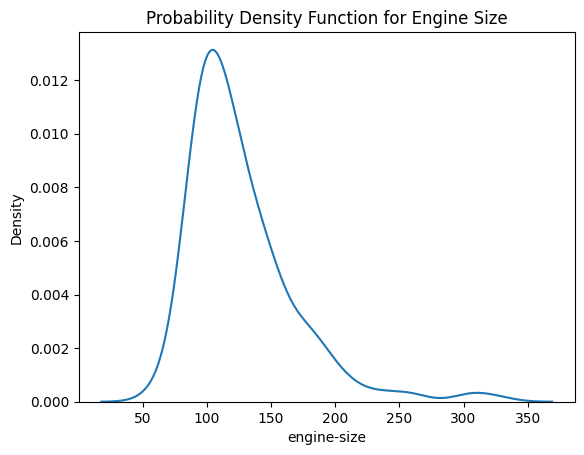

In [39]:
"""Probability Density Function: Assuming 'engine-size' 
is normally distributed, plot its probability density function.
"""

#calculate probability density funciton for engine-size
sns.kdeplot(df['engine-size'])
plt.title("Probability Density Function for Engine Size")


In [41]:
"""
Variance Analysis: Identify the numerical attribute with the 
largest variance and the one with the smallest variance. Print these values.
"""

#get the variances for each numerical attribute
#diagonal of covariance matrix
variances = np.diag(cov_matrix)

#find min and max variance indices
max_var = np.where(variances == max(variances))[0]
min_var = np.where(variances == min(variances))[0]

#get column with min/max variances
min_val = numeric_df.columns[min_var][0]
print("Minimum variance attribute: " + min_val)
print("Variance: " + str(min(variances)))

max_val = numeric_df.columns[max_var][0]
print("\nMaximum variance attribute: " + max_val)
print("Variance: " + str(max(variances)))



Minimum variance attribute: bore
Variance: 0.0729984759131173

Maximum variance attribute: price
Variance: 61615476.529935636


In [43]:
"""
Covariance Analysis: Determine which pair of attributes 
has the largest and smallest covariance. Print these values.
"""


#copy covariance matrix
masked_matrix = cov_matrix.copy()
#remove the diagonal variances from the covariance matrix
np.fill_diagonal(masked_matrix, 0)

print(masked_matrix)

[[ 0.00000000e+00  1.82634146e+01 -3.96963950e+00 -5.46743843e+00
  -6.19193337e-01 -1.63831291e+00 -1.46915907e+02 -5.45927424e+00
  -4.36607208e-02 -3.37677466e-03 -8.78701249e-01  3.49614322e+00
   1.61768593e+02 -2.90422368e-01  2.95324212e-01 -8.01565174e+02]
 [ 1.82634146e+01  0.00000000e+00 -1.07297561e+01  7.47121951e+00
   5.69414634e+00 -2.85575610e+01  1.60516585e+03  1.45721951e+02
  -2.49892003e-01  5.43060308e-01 -1.43412683e+01  2.53458537e+02
   3.57512195e+03 -4.51170732e+01 -3.86926829e+01  3.32416634e+04]
 [-3.96963950e+00 -1.07297561e+01  0.00000000e+00  6.46582365e+01
   1.02215096e+01  8.63083617e+00  2.42242213e+03  1.42070123e+02
   7.93259847e-01  3.02445577e-01  5.94541744e+00  8.33487637e+01
  -1.03098150e+03 -1.84416895e+01 -2.24522641e+01  2.74980204e+04]
 [-5.46743843e+00  7.47121951e+00  6.46582365e+01  0.00000000e+00
   2.21524447e+01  1.47305792e+01  5.61083212e+03  3.49368957e+02
   2.01659262e+00  4.98667176e-01  7.72507015e+00  2.69001226e+02
  -1.68

In [45]:
#get indicies of min and max covariance pairs
min_cind = np.unravel_index(masked_matrix.argmin(), masked_matrix.shape)
print(min_cind)

max_cind = np.unravel_index(masked_matrix.argmax(), masked_matrix.shape)
print(max_cind)

(12, 15)
(6, 15)


In [47]:
#get names of attributes for covariance pairs
min_pair = [numeric_df.columns[i] for i in min_cind]

print("The pair of attributes with the minimum covariance is " + min_pair[0] + " and " + min_pair[1] + ".")
print("Covariance: " + str(np.min(masked_matrix)))

max_pair = [numeric_df.columns[i] for i in max_cind]

print("\nThe pair of attributes with the maximum covariance is " + max_pair[0] + " and " + max_pair[1] + ".")
print("Covariance: " + str(np.max(masked_matrix)))

The pair of attributes with the minimum covariance is peak-rpm and price.
Covariance: -376682.8208052619

The pair of attributes with the maximum covariance is curb-weight and price.
Covariance: 3346605.798373983
